```shell
wget http://205.174.165.80/CICDataset/DoHBrw-2020/Dataset/BenignDoH-NonDoH-Pcaps/ --no-check-certificate     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O ./horse-or-human.zip
```

In [1]:
import os
import zipfile

local_zip = '../../horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human/')
zip_ref.close()

In [1]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [3]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

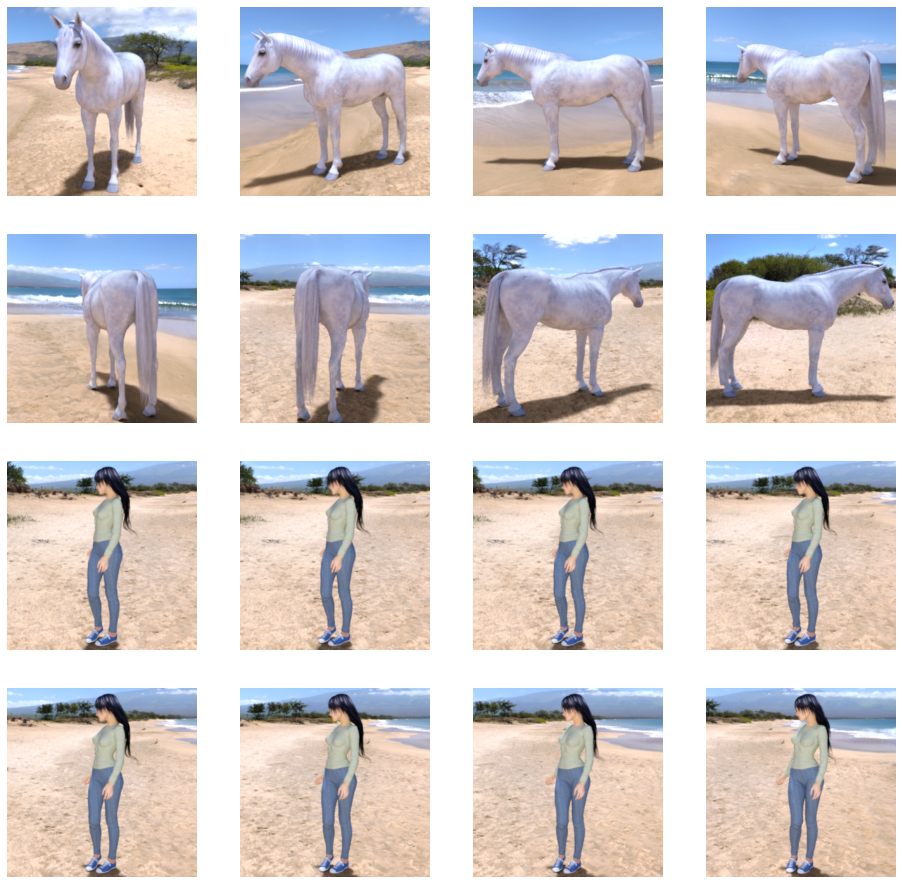

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, activations

In [7]:
visible = Input(shape=(300,300,3)) # 3 表示彩圖(RGB)
conv_2d_one = layers.Conv2D(filters=16, kernel_size=(3,3), activation=activations.relu)(visible) # filters 是隨機值
max_pooling_2d_one = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_one) # MaxPooling2D 表示取最大值
conv_2d_two = layers.Conv2D(filters=32, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_one)
max_pooling_2d_two = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_two)
conv_2d_three = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_two)
max_pooling_2d_three = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_three)
conv_2d_four = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_three)
max_pooling_2d_four = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_four)
conv_2d_five = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_four)
max_pooling_2d_five = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_five)
flatten = layers.Flatten()(max_pooling_2d_five)
dense_three = layers.Dense(512, activation=tf.nn.relu)(flatten) 
output = layers.Dense(1, activation=tf.nn.sigmoid)(dense_three)
model = Model(inputs=visible, outputs=output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0     

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Data Preprocessing

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


## Training

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)
# need install pillow

Epoch 1/15
8/8 [==============================] - 6s 720ms/step - loss: 0.8427 - accuracy: 0.5254
Epoch 2/15
8/8 [==============================] - 5s 638ms/step - loss: 0.6046 - accuracy: 0.7086
Epoch 3/15
8/8 [==============================] - 5s 580ms/step - loss: 1.7519 - accuracy: 0.7898
Epoch 4/15
8/8 [==============================] - 5s 664ms/step - loss: 0.3586 - accuracy: 0.8398
Epoch 5/15
8/8 [==============================] - 5s 674ms/step - loss: 0.3262 - accuracy: 0.8676
Epoch 6/15
8/8 [==============================] - 6s 709ms/step - loss: 0.2278 - accuracy: 0.9010
Epoch 7/15
8/8 [==============================] - 6s 726ms/step - loss: 0.1332 - accuracy: 0.9473
Epoch 8/15
8/8 [==============================] - 6s 789ms/step - loss: 0.1810 - accuracy: 0.9232
Epoch 9/15
8/8 [==============================] - 6s 771ms/step - loss: 0.4215 - accuracy: 0.8443
Epoch 10/15
8/8 [==============================] - 6s 689ms/step - loss: 0.0988 - accuracy: 0.9700
Epoch 11/15
8/8 [==

## Running the Model

In [23]:
from tensorflow.keras.preprocessing import image
import glob
path = 'tmp/'
paths = glob.glob(os.path.join(path, '*.jpg'))
for img in paths:
    img = image.load_img(img, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(path + " is a human")
    else:
        print(path + " is a horse")
 

[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human
[1.]
tmp/ is a human


## Visualizing Intermediate Representations

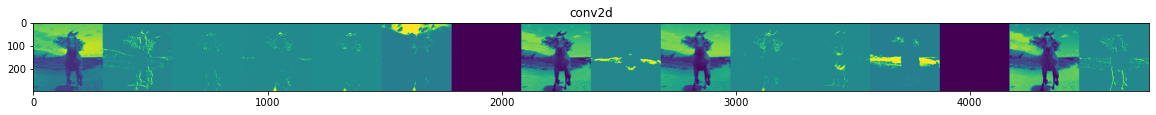

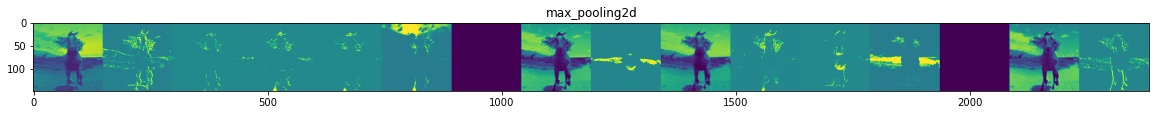

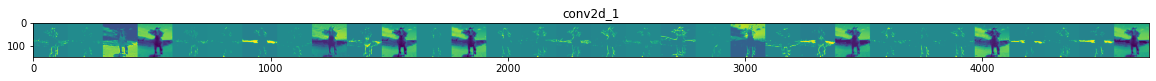

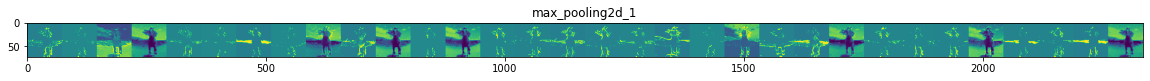

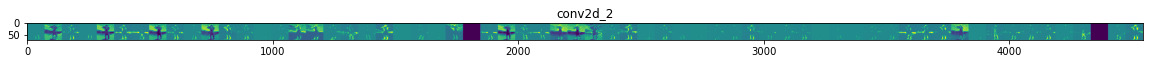

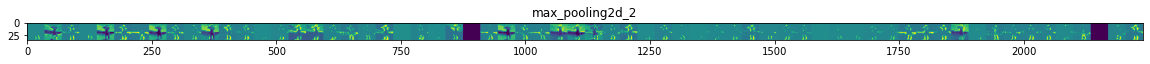

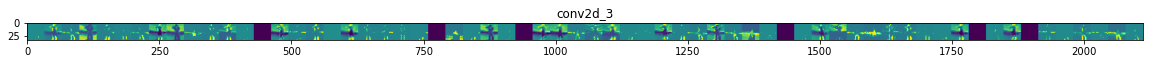

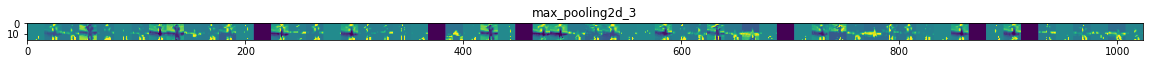

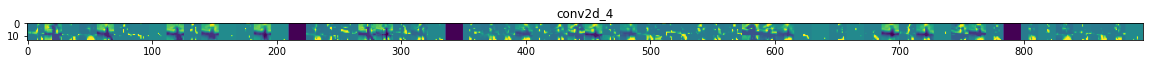

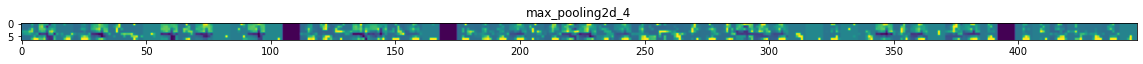

In [13]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')